In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import packages

import numpy as np
import math
from nltk import word_tokenize
from matplotlib import pyplot as plt

In [3]:
#load data
data = open("/content/drive/MyDrive/IR-assignment-2-data.txt", 'r',encoding='Utf-8')

In [4]:
#read text-data from data

read_data = data.readlines()
print(len(read_data))

239093


In [5]:
#extract data with qid:4

read_lines=[]
i=0
for l in read_data:
    if(l.split()[1]=='qid:4'):
        #print(l)
        read_lines.append(l)
    i = i + 1

In [6]:
#calculating DCG
dcg = []
DCG50 = 0
DCGWhole = 0
c = 0
p=2
for i in read_lines:
  ls = []
  var = int(i.split()[0])/(math.log(p,2))
  if(c<50):
    DCG50 += var

  DCGWhole += var
  ls.append(var)
  ls.append(i)
  dcg.append(ls)
  c+=1
  p+=1

In [7]:
print(DCG50,DCGWhole)

7.19450227631398 12.337484420604602


In [8]:
#calculate cummulative value
i=1
while i< len(dcg):
  dcg[i][0] += dcg[i-1][0]
  i+=1


In [9]:
dcg = sorted(dcg,key=lambda x: (x[0]),reverse=True)
count=0
dcg_write = open("DCG.txt", "w")  # write mode
for i in range(len(dcg)):
  dcg_write.write(dcg[i][1])
  count+=1
print(count)

dcg_write.close()
#no of doc with qid 4

103


In [10]:
for_idcg = []
for i in read_lines:
  ls = []
  sp = i.split()
  ls.append(int(sp[0]))
  ls.append(i)
  for_idcg.append(ls)

#for_idcg

In [11]:
for_idcg = sorted(for_idcg,key=lambda x: (x[0]),reverse=True)
#for_idcg

In [12]:
idcg50 = 0
idcgWhole = 0
p=2
c = 0
for i in range(len(for_idcg)):
  var = for_idcg[i][0]/(math.log(p,2))
  if c<50:
    idcg50 += var
  
  idcgWhole += var
  c+=1

ndcg50 = DCG50/idcg50
ndcgWhole = DCGWhole/idcgWhole

print("NDCG At 50 : ",ndcg50)
print("NDCG for whole : ",ndcgWhole)

NDCG At 50 :  0.11419844883038063
NDCG for whole :  0.1958330860413429


239093
total_relevant:  44
103
103


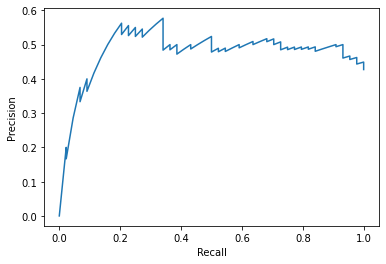

In [13]:
import matplotlib.pyplot as plt 
precList=[]
for i in read_data:
  precList.append([int(i.split()[0]),i.split()[1],float(i.split()[76].split(':',1)[-1])])
print(len(precList))
precList.sort(key=lambda x: x[2],reverse=True)

total_relevant = 0

for i in range(len(precList)):
    if precList[i][0] > 0 and precList[i][1] == 'qid:4':
        total_relevant=total_relevant+1
print("total_relevant: ",total_relevant)

recall=[]
precision = []
relevant=0
returned=0

for i in range(len(precList)):

    if precList[i][1]=='qid:4':
        returned+=1
        if precList[i][0] > 0:
            relevant+=1
        precision.append(relevant/returned)

        
        recall.append(relevant/total_relevant)
print(len(recall))
print(len(precision))

plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()
